In [22]:
# This the shape generator file for Excel spreadsheets
# Test Runs: Create 20 spreadsheets in long format (4 columns (Date, Channel, Metric, Value), 8 rows)
# Noise transformations: random values for int, set value of strings for now (Daily granularity for date, 2 choices for Channel and Metric)


In [23]:

import pandas as pd
import numpy as np
from itertools import product
import random
import os

long_folder = 'long_first'
multi_index_folder = 'multi_index'
multi_table_folder = 'multi_table'
relational_folder = 'relational'
wide_folder = 'wide'


Long format function

In [24]:
def generate_long_df(
    num_rows=16,
    add_empty_cells=True,
    empty_frac=0.1,
    change_types=True,
    wrong_type_cols=['Value']
):
    # Generate date range
    base_date = pd.to_datetime('2025-07-10') + pd.Timedelta(days=np.random.randint(0, 365))
    dates = pd.date_range(base_date, periods=num_rows//4, freq='7D')

    # Generate combinations
    channels = ['TV', 'Radio']
    metrics = ['Spend', 'GRPs']
    all_combinations = list(product(dates, channels, metrics))
    df = pd.DataFrame(all_combinations, columns=['Date', 'Channel', 'Metric'])

    # Assign values
    def random_value(metric):
        if metric == 'Spend':
            return np.random.randint(50, 201)
        return np.random.randint(1, 11)

    df['Value'] = df['Metric'].apply(random_value)

    # Pad or trim to desired num_rows
    if len(df) < num_rows:
        df = pd.concat([df] * (num_rows // len(df) + 1), ignore_index=True)
    df = df.sample(n=num_rows, random_state=42).reset_index(drop=True)

    # Introduce empty cells
    if add_empty_cells:
        total_cells = df.size
        num_empty = int(total_cells * empty_frac)
        for _ in range(num_empty):
            row = np.random.randint(0, df.shape[0])
            col = np.random.choice(df.columns)
            df.at[row, col] = np.nan

    # Introduce wrong data types
    if change_types:
        for col in wrong_type_cols:
            for row in np.random.choice(df.index, size=max(1, len(df)//8), replace=False):
                if col == 'Value':
                    df.at[row, col] = random.choice(['one hundred', 'ten', 'NaN'])
                elif col == 'Date':
                    df.at[row, col] = random.choice(['not a date', 'yesterday', 'soon'])

    return df

Long Output

In [25]:
os.makedirs(long_folder, exist_ok=True)

NUM_SETS = 20

for i in range(NUM_SETS):
    params = {
        'num_rows': random.randint(12, 50),
        'add_empty_cells': random.choice([True, False]),
        'empty_frac': round(random.uniform(0.05, 0.3), 2),
        'change_types': random.choice([True, False]),
        'wrong_type_cols': random.sample(['Value', 'Date'], 
                                         k=random.randint(0, 2))
    }

    df = generate_long_df(**params)
    filepath = os.path.join(long_folder, f'synthetic_dataset_{i+1}.xlsx')
    df.to_excel(filepath, index=False)

    print(f"Saved: {filepath}")

C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3559396912.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'not a date' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['not a date', 'yesterday', 'soon'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3559396912.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ten' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['one hundred', 'ten', 'NaN'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3559396912.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ten' has dtype incompatible with float64, p

Saved: long_first\synthetic_dataset_1.xlsx
Saved: long_first\synthetic_dataset_2.xlsx
Saved: long_first\synthetic_dataset_3.xlsx
Saved: long_first\synthetic_dataset_4.xlsx
Saved: long_first\synthetic_dataset_5.xlsx
Saved: long_first\synthetic_dataset_6.xlsx
Saved: long_first\synthetic_dataset_7.xlsx
Saved: long_first\synthetic_dataset_8.xlsx
Saved: long_first\synthetic_dataset_9.xlsx
Saved: long_first\synthetic_dataset_10.xlsx
Saved: long_first\synthetic_dataset_11.xlsx
Saved: long_first\synthetic_dataset_12.xlsx
Saved: long_first\synthetic_dataset_13.xlsx
Saved: long_first\synthetic_dataset_14.xlsx
Saved: long_first\synthetic_dataset_15.xlsx
Saved: long_first\synthetic_dataset_16.xlsx


C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3559396912.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NaN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['one hundred', 'ten', 'NaN'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3559396912.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'yesterday' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['not a date', 'yesterday', 'soon'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3559396912.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'soon' has dtype incompatible with datetime

Saved: long_first\synthetic_dataset_17.xlsx
Saved: long_first\synthetic_dataset_18.xlsx
Saved: long_first\synthetic_dataset_19.xlsx
Saved: long_first\synthetic_dataset_20.xlsx


Wide Format function

In [26]:
def generate_df_wide_format(
    num_rows=8,
    add_empty_cells=True,
    empty_frac=0.1,
    change_types=True,
    wrong_type_cols=['TV_Spend']
):
    num_dates = max(1, num_rows)
    base_date = pd.to_datetime('2025-07-10') + pd.Timedelta(days=np.random.randint(0, 100))
    dates = pd.date_range(base_date, periods=num_dates, freq='7D')

    records = []
    for date in dates:
        record = {
            'Date': date,
            'TV_Spend': np.random.randint(50, 201),
            'TV_GRPs': np.random.randint(1, 11),
            'Radio_Spend': np.random.randint(50, 201),
            'Radio_GRPs': np.random.randint(1, 11)
        }
        records.append(record)

    df = pd.DataFrame(records)

    # Introduce empty cells
    if add_empty_cells:
        total_cells = df.size
        num_empty = int(total_cells * empty_frac)
        for _ in range(num_empty):
            row = np.random.randint(0, df.shape[0])
            col = np.random.choice(df.columns)
            df.at[row, col] = np.nan

    # Wrong types
    for col in wrong_type_cols:
        if col in df.columns:
            for row in np.random.choice(df.index, size=max(1, len(df)//8), replace=False):
                if 'Spend' in col:
                    df.at[row, col] = random.choice(['NaN', 'one hundred', 'low'])
                elif 'GRPs' in col:
                    df.at[row, col] = random.choice(['N/A', 'few', 'ten'])
                elif col == 'Date':
                    df.at[row, col] = random.choice(['soon', 'not a date'])

    # Set 'Date' as index before transpose
    df.set_index('Date', inplace=True)

    # Transpose and reset index for labeling
    df_transposed = df.transpose()
    df_transposed.columns.name = 'Date'  # Rename column axis
    df_transposed.index.name = 'Metric_Channel'  # Name row axis

    return df_transposed



Wide Output

In [27]:
os.makedirs(wide_folder, exist_ok=True)

NUM_SETS = 20

for i in range(NUM_SETS):
    params = {
        'num_rows': random.randint(12, 50),
        'add_empty_cells': random.choice([True, False]),
        'empty_frac': round(random.uniform(0.05, 0.3), 2),
        'change_types': random.choice([True, False]),
        'wrong_type_cols': random.sample(['Value', 'Date'], 
                                         k=random.randint(0, 2))
    }

    df = generate_df_wide_format(**params)
    filepath = os.path.join(wide_folder, f'synthetic_dataset_{i+1}.xlsx')
    df.to_excel(filepath, index=False)

    print(f"Saved: {filepath}")

Saved: wide\synthetic_dataset_1.xlsx
Saved: wide\synthetic_dataset_2.xlsx
Saved: wide\synthetic_dataset_3.xlsx
Saved: wide\synthetic_dataset_4.xlsx
Saved: wide\synthetic_dataset_5.xlsx
Saved: wide\synthetic_dataset_6.xlsx
Saved: wide\synthetic_dataset_7.xlsx


C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3217170216.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'not a date' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['soon', 'not a date'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3217170216.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'soon' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['soon', 'not a date'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3217170216.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'not a date' has dtype incompatible with datetime64[ns

Saved: wide\synthetic_dataset_8.xlsx
Saved: wide\synthetic_dataset_9.xlsx
Saved: wide\synthetic_dataset_10.xlsx
Saved: wide\synthetic_dataset_11.xlsx
Saved: wide\synthetic_dataset_12.xlsx
Saved: wide\synthetic_dataset_13.xlsx
Saved: wide\synthetic_dataset_14.xlsx


C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3217170216.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'not a date' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['soon', 'not a date'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3217170216.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'soon' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['soon', 'not a date'])


Saved: wide\synthetic_dataset_15.xlsx
Saved: wide\synthetic_dataset_16.xlsx
Saved: wide\synthetic_dataset_17.xlsx
Saved: wide\synthetic_dataset_18.xlsx
Saved: wide\synthetic_dataset_19.xlsx
Saved: wide\synthetic_dataset_20.xlsx


C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\3217170216.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'soon' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['soon', 'not a date'])


Multi-index Format Function


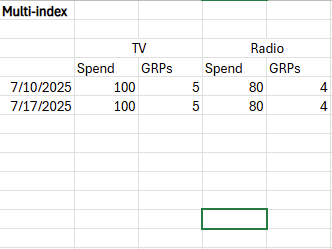

In [28]:
def generate_multiindex_sheets(
    num_dates=2,
    add_empty_cells=True,
    empty_frac=0.1,
    change_types=True,
    wrong_type_cells=[('TV', 'Spend')]
):
    # Generate date range
    base_date = pd.to_datetime('2025-07-10') + pd.Timedelta(days=np.random.randint(0, 100))
    dates = pd.date_range(start=base_date, periods=num_dates, freq='7D')

    # Channels and metrics
    channels = ['TV', 'Radio']
    metrics = ['Spend', 'GRPs']

    # Build row-by-row dictionary
    records = []
    for date in dates:
        row = {}
        for ch in channels:
            for m in metrics:
                val = np.random.randint(50, 201) if m == 'Spend' else np.random.randint(1, 11)
                row[(ch, m)] = val
        row['Date'] = date
        records.append(row)

    # Create DataFrame
    df = pd.DataFrame(records)

    # Set Date as index, MultiIndex for columns
    df.set_index('Date', inplace=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns)

    # Introduce NaNs
    if add_empty_cells:
        total_cells = df.size
        num_empty = int(total_cells * empty_frac)
        for _ in range(num_empty):
            row = np.random.choice(df.index)
            col = random.choice(df.columns)
            df.at[row, col] = np.nan

    # Introduce wrong types
    if change_types:
        for col in wrong_type_cells:
            if col in df.columns:
                for row in np.random.choice(df.index, size=max(1, len(df)//8), replace=False):
                    df.at[row, col] = random.choice(['low', 'NaN', 'unknown'])

    return df


Multi-Index Output

In [29]:
os.makedirs(multi_index_folder, exist_ok=True)

NUM_SETS = 20

for i in range(NUM_SETS):
    params = {
        'num_dates': random.randint(12, 50),
        'add_empty_cells': random.choice([True, False]),
        'empty_frac': round(random.uniform(0.05, 0.3), 2),
        'change_types': random.choice([True, False]),
        'wrong_type_cells': random.sample(['TV', 'Spend'], 
                                         k=random.randint(0, 2))
    }

    df = generate_multiindex_sheets(**params)
    filepath = os.path.join(multi_index_folder, f'synthetic_dataset_{i+1}.xlsx')
    df.to_excel(filepath)

    print(f"Saved: {filepath}")


Saved: multi_index\synthetic_dataset_1.xlsx
Saved: multi_index\synthetic_dataset_2.xlsx
Saved: multi_index\synthetic_dataset_3.xlsx
Saved: multi_index\synthetic_dataset_4.xlsx
Saved: multi_index\synthetic_dataset_5.xlsx
Saved: multi_index\synthetic_dataset_6.xlsx
Saved: multi_index\synthetic_dataset_7.xlsx


C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1961310704.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'NaN', 'unknown'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1961310704.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'NaN', 'unknown'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1961310704.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with int64, please explicitly

Saved: multi_index\synthetic_dataset_8.xlsx
Saved: multi_index\synthetic_dataset_9.xlsx
Saved: multi_index\synthetic_dataset_10.xlsx
Saved: multi_index\synthetic_dataset_11.xlsx
Saved: multi_index\synthetic_dataset_12.xlsx
Saved: multi_index\synthetic_dataset_13.xlsx


C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1961310704.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NaN' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'NaN', 'unknown'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1961310704.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NaN' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'NaN', 'unknown'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1961310704.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with int64, please explicitly cast to a c

Saved: multi_index\synthetic_dataset_14.xlsx
Saved: multi_index\synthetic_dataset_15.xlsx
Saved: multi_index\synthetic_dataset_16.xlsx
Saved: multi_index\synthetic_dataset_17.xlsx
Saved: multi_index\synthetic_dataset_18.xlsx
Saved: multi_index\synthetic_dataset_19.xlsx
Saved: multi_index\synthetic_dataset_20.xlsx


C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1961310704.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'NaN', 'unknown'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1961310704.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'NaN', 'unknown'])


Multi-Table


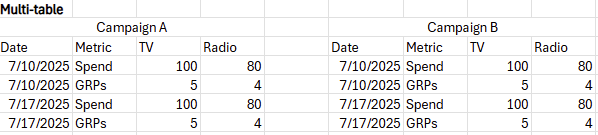


Multi-Table Output

In [30]:
def generate_multi_table(num_dates=2):
    base_date = pd.to_datetime('2025-07-10') + pd.Timedelta(days=np.random.randint(0, 100))
    dates = pd.date_range(base_date, periods=num_dates, freq='7D')

    rows = []
    for date in dates:
        for metric in ['Spend', 'GRPs']:
            tv_value = np.random.randint(50, 201) if metric == 'Spend' else np.random.randint(1, 11)
            radio_value = np.random.randint(50, 201) if metric == 'Spend' else np.random.randint(1, 11)
            rows.append([date.strftime('%d/%m/%Y'), metric, tv_value, radio_value])

    df = pd.DataFrame(rows, columns=['Date', 'Metric', 'TV', 'Radio'])
    return df

def generate_multitable_campaign_sheet(
    num_campaigns=3,
    num_dates=2,
    add_empty_cells=True,
    empty_frac=0.1,
    change_types=True
):
    tables = []
    for i in range(num_campaigns):
        df = generate_multi_table(num_dates)

        # Add empty cells
        if add_empty_cells:
            total_cells = df.size
            num_empty = int(total_cells * empty_frac)
            for _ in range(num_empty):
                row = np.random.randint(0, df.shape[0])
                col = np.random.choice(df.columns)
                df.at[row, col] = np.nan

        # Add wrong data types
        if change_types:
            for col in ['TV', 'Radio']:
                for row in np.random.choice(df.index, size=max(1, len(df)//6), replace=False):
                    df.at[row, col] = random.choice(['low', 'missing'])

        # Add campaign label to columns
        df.columns = pd.MultiIndex.from_product([[f'Campaign {chr(65 + i)}'], df.columns])
        tables.append(df)

        # Insert a visible spacer column after each campaign (except the last)
        if i < num_campaigns - 1:
            spacer = pd.DataFrame({'Spacer': [''] * df.shape[0]})
            spacer.columns = pd.MultiIndex.from_tuples([(' ', ' ')])  # visually blank header
            tables.append(spacer)

    return pd.concat(tables, axis=1)


Multi-Table Output

In [31]:
multi_table_folder = 'multi_table'
os.makedirs(multi_table_folder, exist_ok=True)

NUM_SETS = 20

for i in range(NUM_SETS):
    params = {
        'num_campaigns': random.randint(2, 4),                         # 2 to 4 side-by-side campaigns
        'num_dates': random.randint(2, 6),                             # number of weekly dates
        'add_empty_cells': random.choice([True, False]),
        'empty_frac': round(random.uniform(0.05, 0.3), 2),
        'change_types': random.choice([True, False])
    }

    df = generate_multitable_campaign_sheet(**params)
    filepath = os.path.join(multi_table_folder, f'synthetic_dataset_{i+1}.xlsx')
    df.to_excel(filepath)

    print(f"Saved: {filepath}")


Saved: multi_table\synthetic_dataset_1.xlsx
Saved: multi_table\synthetic_dataset_2.xlsx
Saved: multi_table\synthetic_dataset_3.xlsx


C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1675927129.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'missing'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1675927129.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'missing'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1675927129.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low' has dtype incompatible with int64, please explicitly cast to a compatible dtyp

Saved: multi_table\synthetic_dataset_4.xlsx
Saved: multi_table\synthetic_dataset_5.xlsx
Saved: multi_table\synthetic_dataset_6.xlsx
Saved: multi_table\synthetic_dataset_7.xlsx
Saved: multi_table\synthetic_dataset_8.xlsx
Saved: multi_table\synthetic_dataset_9.xlsx
Saved: multi_table\synthetic_dataset_10.xlsx
Saved: multi_table\synthetic_dataset_11.xlsx


C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1675927129.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'missing'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1675927129.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'missing'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1675927129.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a c

Saved: multi_table\synthetic_dataset_12.xlsx
Saved: multi_table\synthetic_dataset_13.xlsx
Saved: multi_table\synthetic_dataset_14.xlsx
Saved: multi_table\synthetic_dataset_15.xlsx
Saved: multi_table\synthetic_dataset_16.xlsx
Saved: multi_table\synthetic_dataset_17.xlsx
Saved: multi_table\synthetic_dataset_18.xlsx
Saved: multi_table\synthetic_dataset_19.xlsx
Saved: multi_table\synthetic_dataset_20.xlsx


C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1675927129.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'missing'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1675927129.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[row, col] = random.choice(['low', 'missing'])
C:\Users\QuentinGEOFFROY\AppData\Local\Temp\ipykernel_18732\1675927129.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compa